In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [3]:
df_main = pd.read_csv('genres_v2.csv')

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_main

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [5]:
df_main.genre.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [6]:
# data cleaning
take_notna = lambda s1,s2: s1 if type(s1) == str else s2
df_main["song_title"]=df_main["song_name"].combine(df_main["title"],take_notna, fill_value=None)
df_main.drop(columns = ["song_name","title","Unnamed: 0"], inplace=True)
df_main.dropna(inplace=True)


In [7]:
df_main

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,Euphoric Hardstyle


In [8]:
df_main.genre.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [9]:
df_main

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,Euphoric Hardstyle


## Train Test Split right away

In [92]:
X = df_main
y = df_main.loc[:, 'genre']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010010)

## EDA

In [146]:
for feature in X_train.columns.values:
    print(X_train[feature].describe())

count    33839.000000
mean         0.638796
std          0.156725
min          0.065100
25%          0.524000
50%          0.645000
75%          0.766000
max          0.988000
Name: danceability, dtype: float64
count    33839.000000
mean         0.762889
std          0.183606
min          0.000243
25%          0.632000
50%          0.803000
75%          0.923000
max          1.000000
Name: energy, dtype: float64
count    33839.000000
mean         5.368598
std          3.658309
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: key, dtype: float64
count    33839.000000
mean        -6.456456
std          2.949079
min        -33.357000
25%         -8.158000
50%         -6.221000
75%         -4.494000
max          3.148000
Name: loudness, dtype: float64
count    33839.000000
mean         0.550016
std          0.497499
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

ValueError: could not convert string to float: 'audio_features'

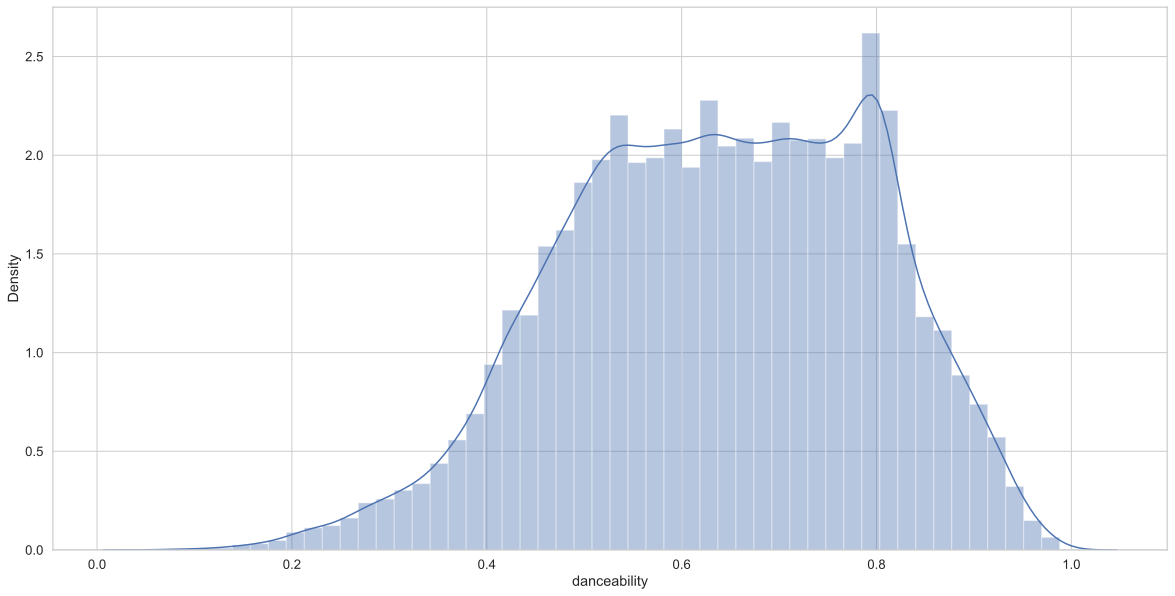

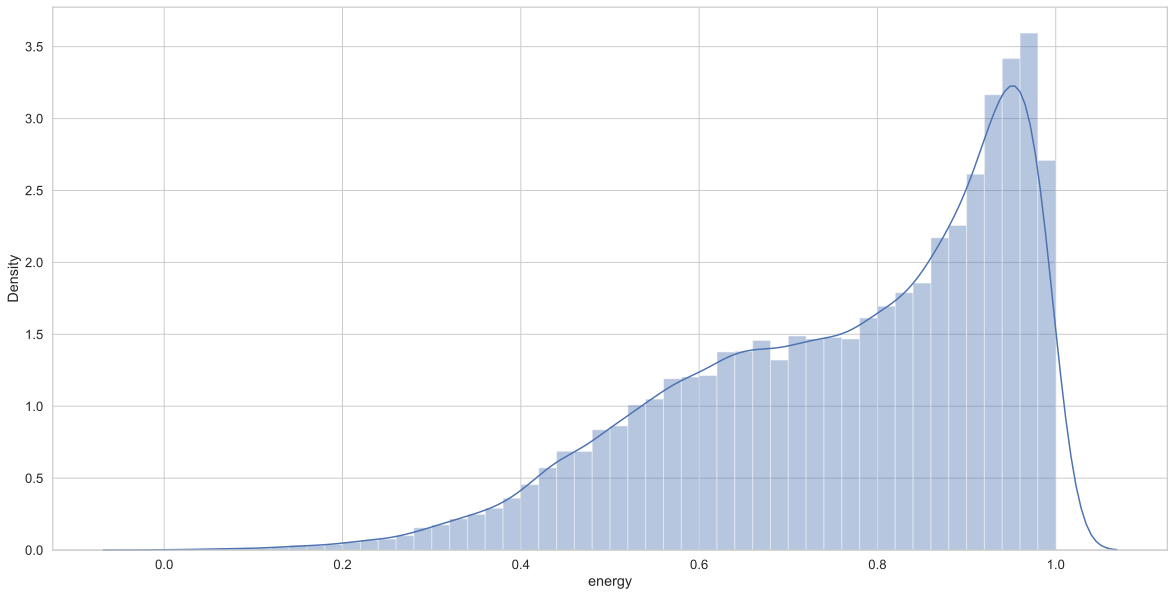

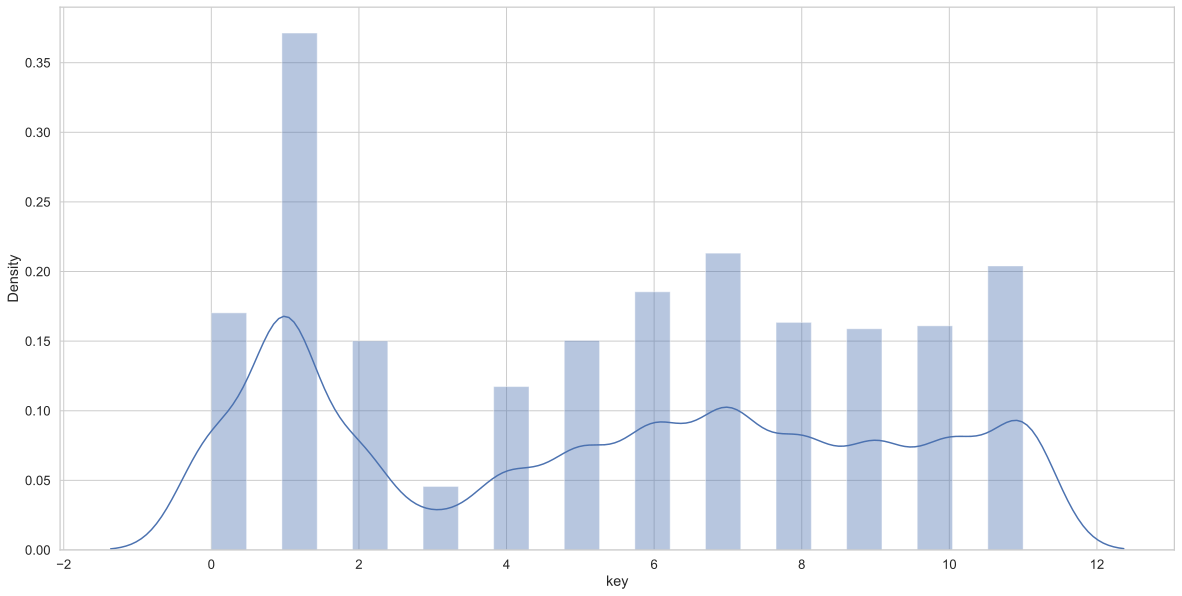

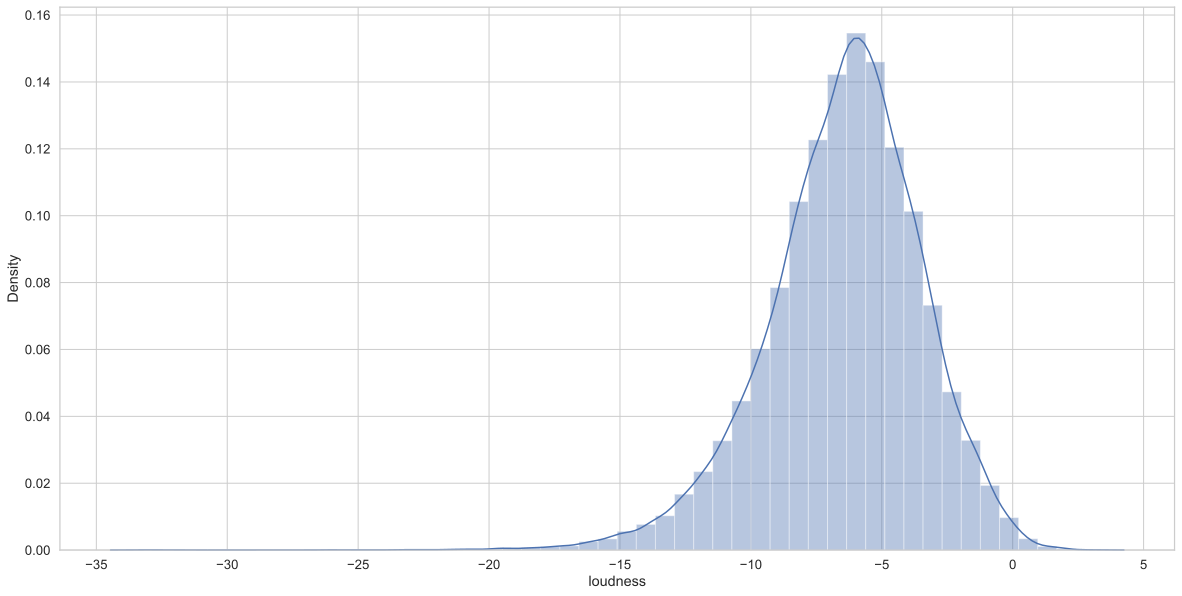

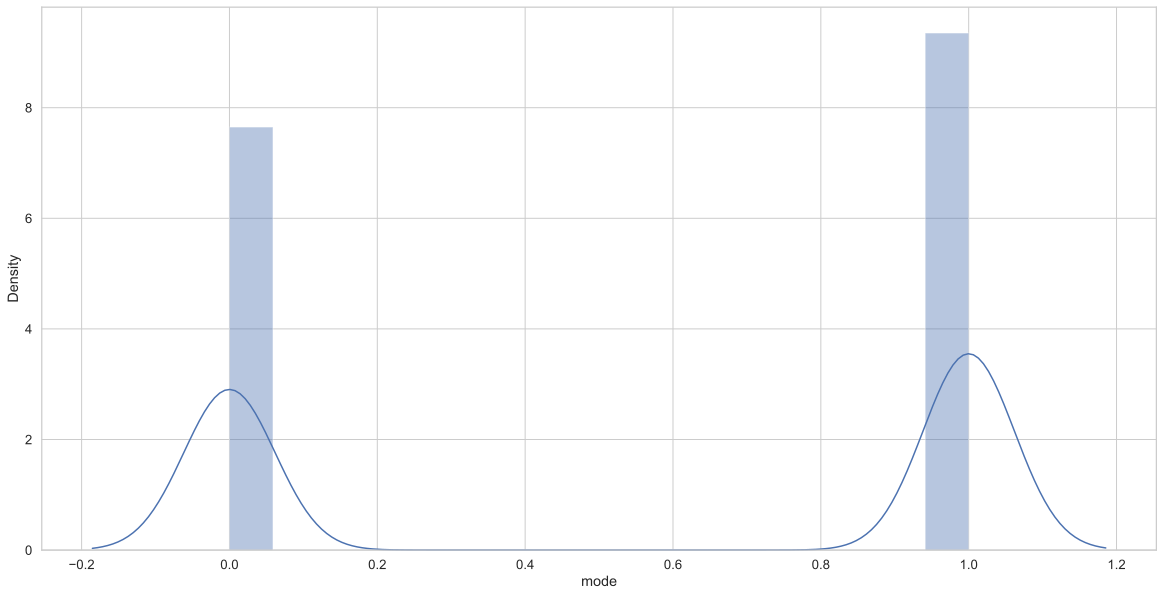

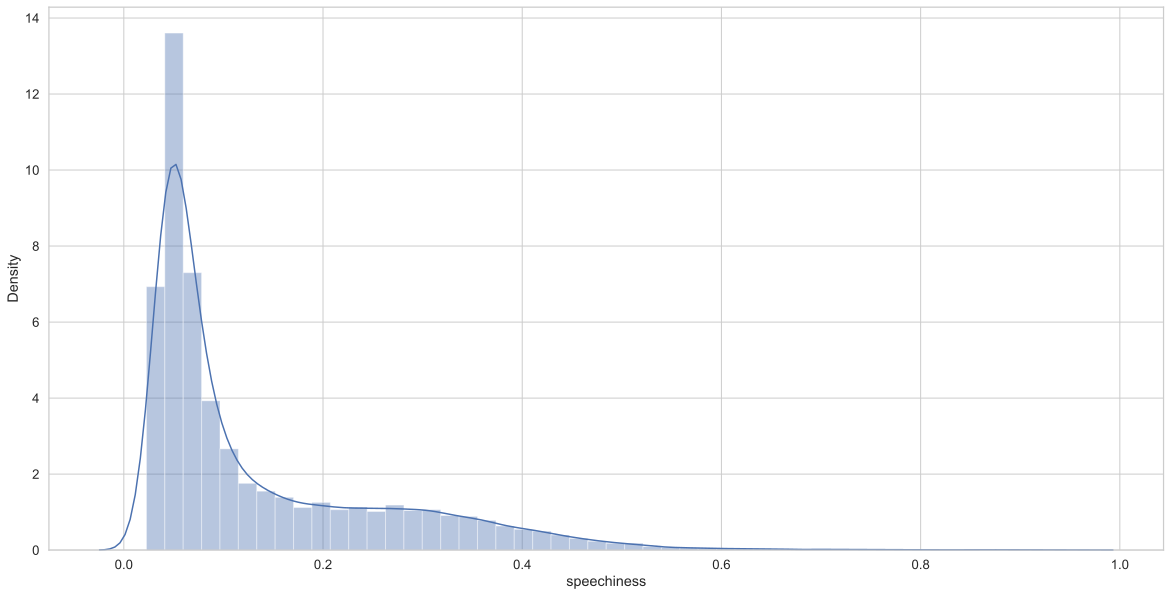

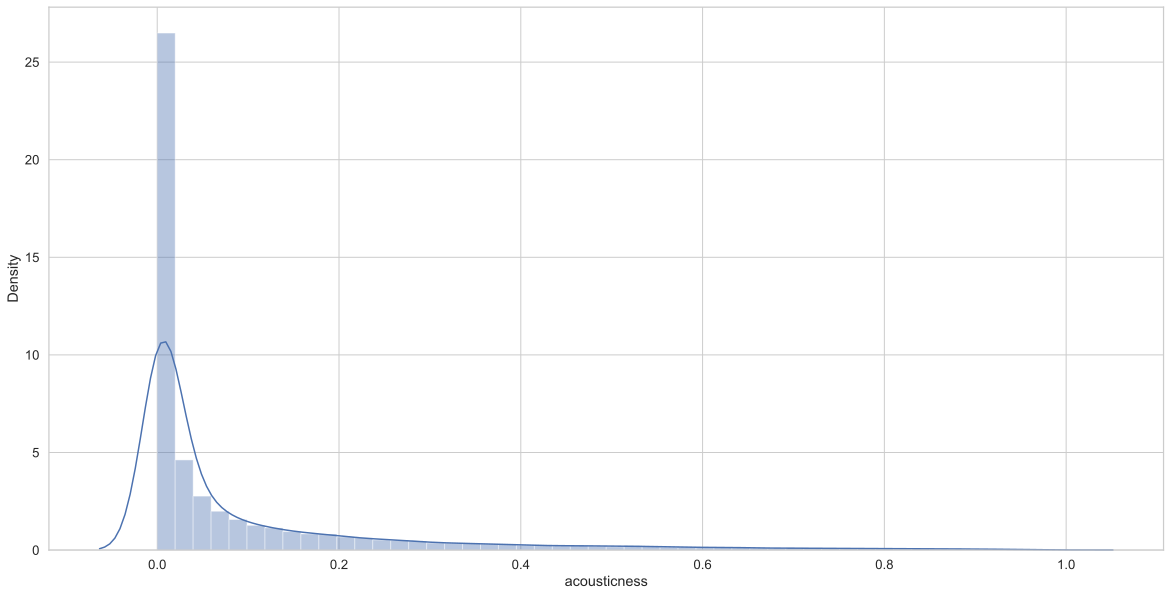

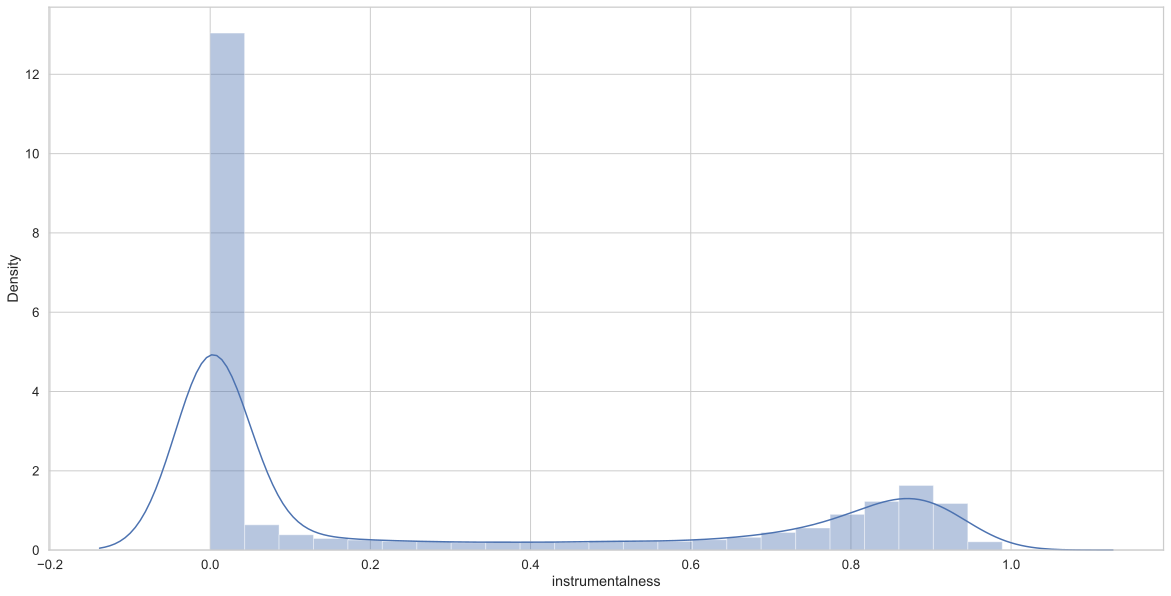

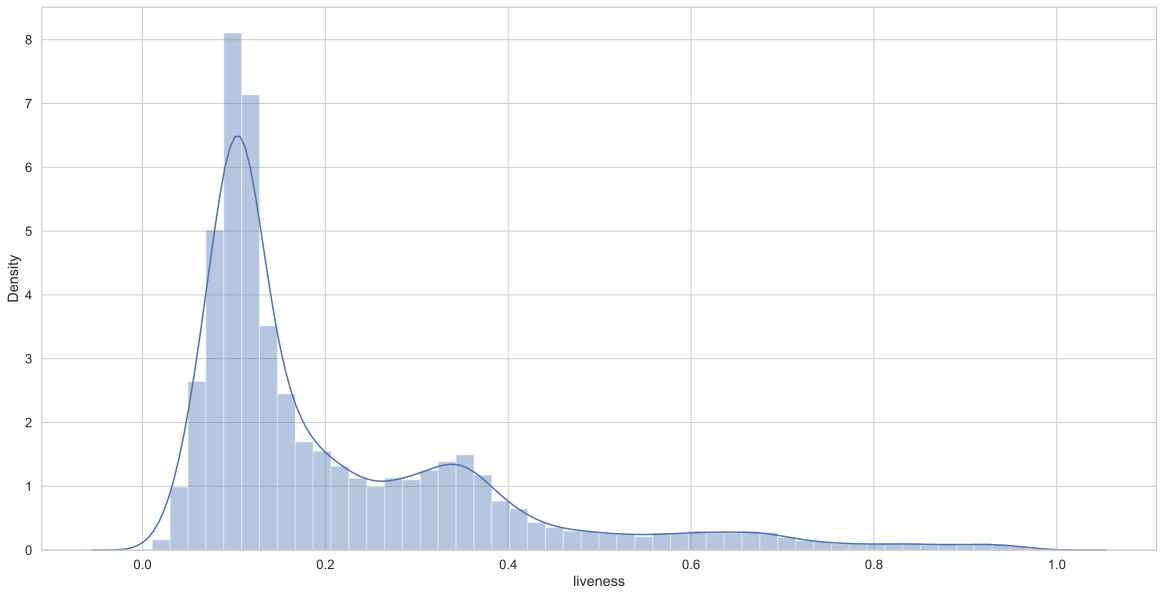

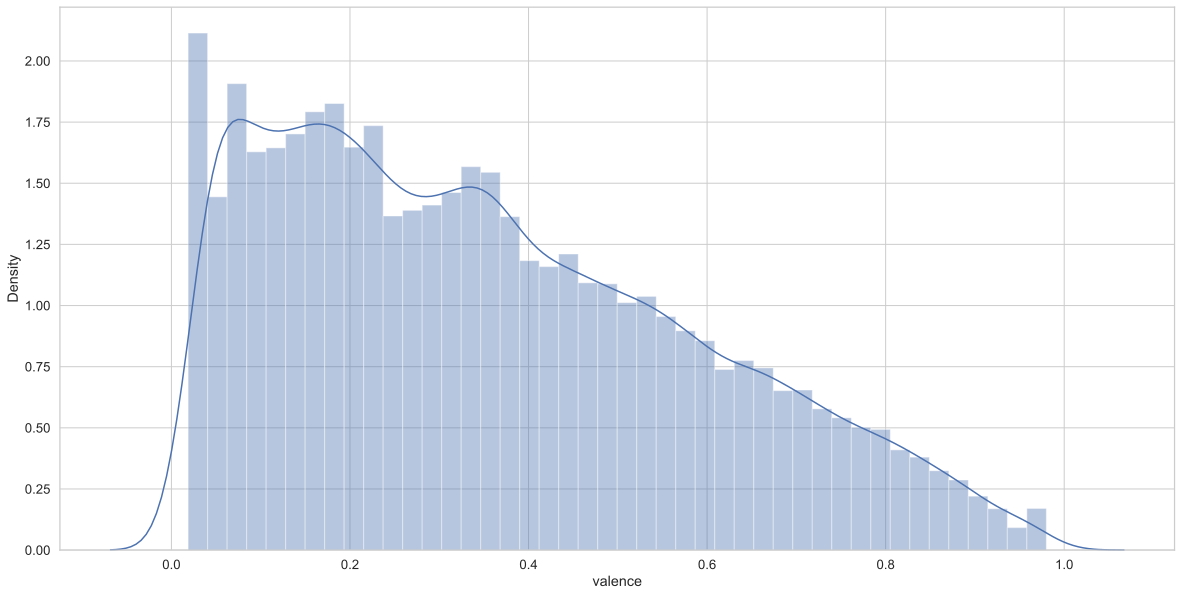

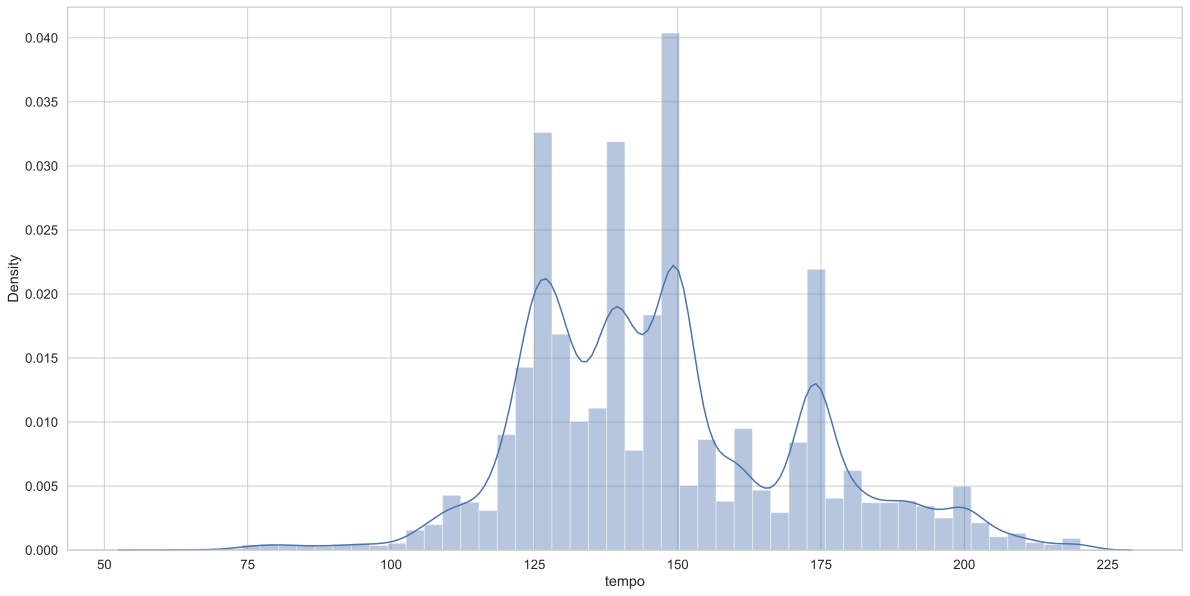

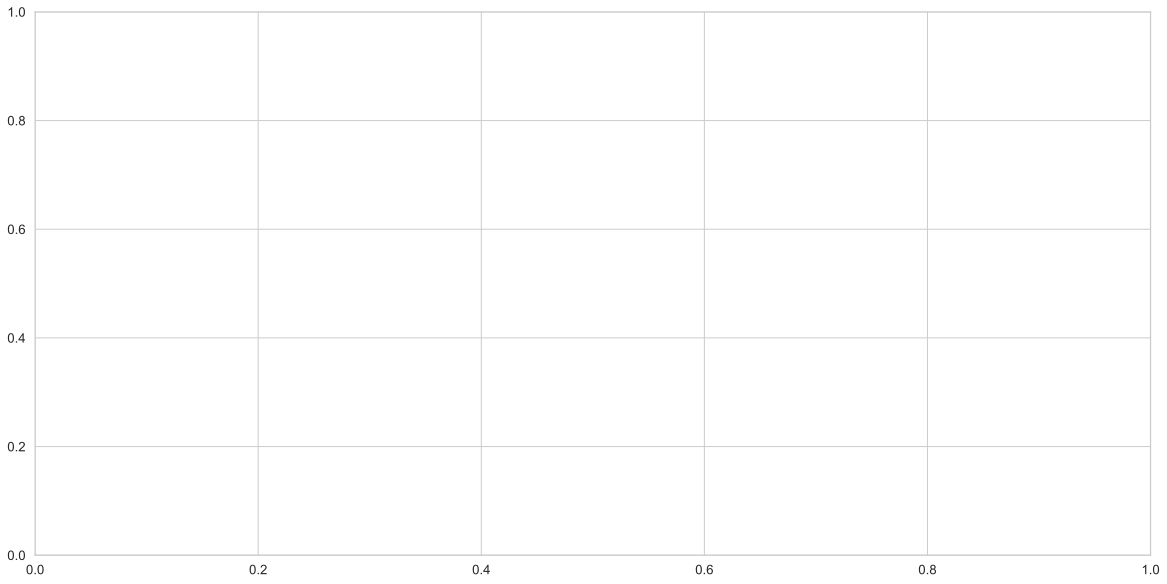

In [148]:
#distributions of features across all genres
for i, col in enumerate(X_train.columns):
    plt.figure(i)
    sns.distplot(X_train[col])

In [ ]:
# look at descriptive statistics broken up by genre

In [149]:
for genre in X_train.genre.unique():
    print(genre, X_train.loc[X_train['genre'] == genre].describe())

trap        danceability       energy          key     loudness         mode  \
count   2389.000000  2389.000000  2389.000000  2389.000000  2389.000000   
mean       0.594263     0.905792     4.977396    -2.729643     0.609041   
std        0.128485     0.097672     3.792723     1.947903     0.488067   
min        0.150000     0.288000     0.000000   -15.113000     0.000000   
25%        0.512000     0.873000     1.000000    -3.761000     0.000000   
50%        0.597000     0.940000     5.000000    -2.537000     1.000000   
75%        0.681000     0.973000     9.000000    -1.365000     1.000000   
max        0.935000     1.000000    11.000000     1.851000     1.000000   

       speechiness  acousticness  instrumentalness    liveness      valence  \
count  2389.000000   2389.000000       2389.000000  2389.00000  2389.000000   
mean      0.204989      0.023621          0.196270     0.27707     0.301602   
std       0.146036      0.059498          0.272442     0.20246     0.176318   
min

Dark Trap        danceability       energy          key     loudness         mode  \
count   3627.000000  3627.000000  3627.000000  3627.000000  3627.000000   
mean       0.618944     0.646399     5.284257    -7.983561     0.539289   
std        0.160854     0.180240     3.642306     3.147184     0.498523   
min        0.097900     0.000243     0.000000   -25.222000     0.000000   
25%        0.516000     0.520000     1.000000    -9.842500     0.000000   
50%        0.625000     0.649000     6.000000    -7.676000     1.000000   
75%        0.739000     0.791000     8.000000    -5.828500     1.000000   
max        0.985000     0.998000    11.000000     1.646000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  3627.000000   3627.000000       3627.000000  3627.000000  3627.000000   
mean      0.123534      0.161507          0.274856     0.183880     0.271817   
std       0.121906      0.214455          0.365109     0.143446     0.2055

Underground Rap        danceability       energy          key     loudness         mode  \
count   4671.000000  4671.000000  4671.000000  4671.000000  4671.000000   
mean       0.743612     0.638163     5.117534    -7.327078     0.611218   
std        0.128303     0.156928     3.766597     2.781928     0.487526   
min        0.241000     0.134000     0.000000   -20.149000     0.000000   
25%        0.671000     0.526000     1.000000    -8.902000     0.000000   
50%        0.765000     0.636000     5.000000    -7.046000     1.000000   
75%        0.837000     0.750500     8.000000    -5.447000     1.000000   
max        0.985000     0.997000    11.000000     2.499000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  4671.000000   4671.000000       4671.000000  4671.000000  4671.000000   
mean      0.226611      0.163937          0.024330     0.193003     0.445896   
std       0.145156      0.186560          0.113865     0.150365     

In [150]:
#box and whisker plot for each feature, by genre
X_train.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_title'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


TypeError: Neither the `x` nor `y` variable appears to be numeric.

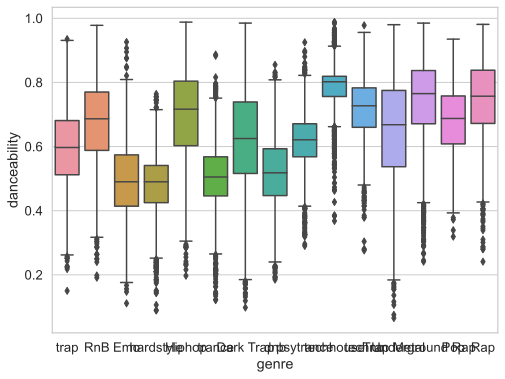

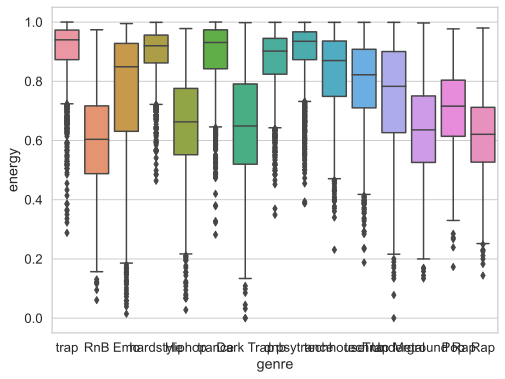

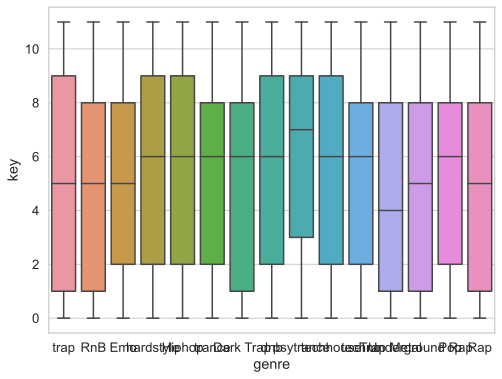

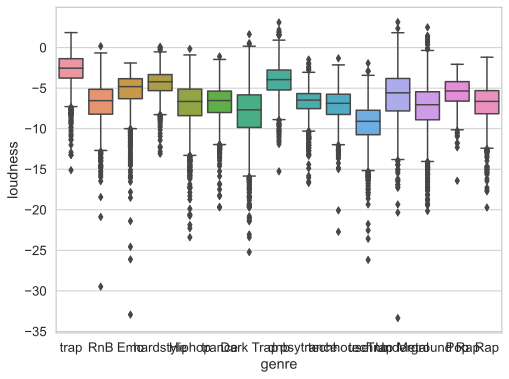

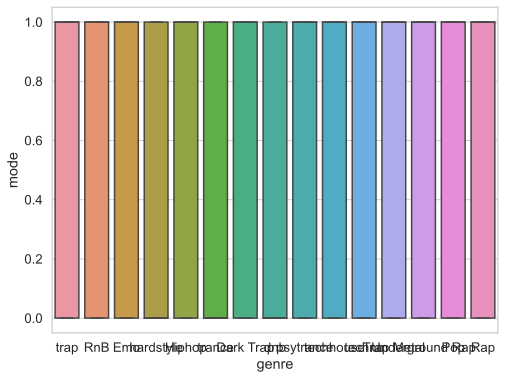

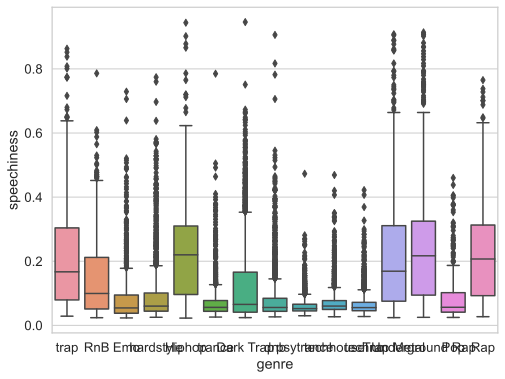

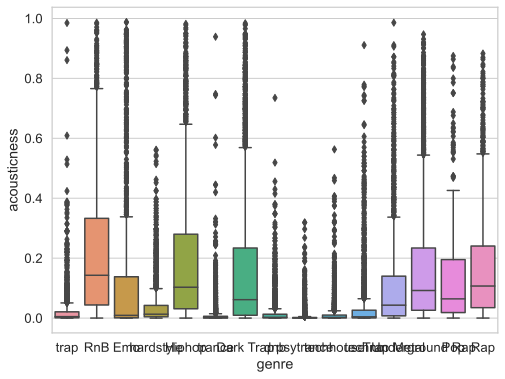

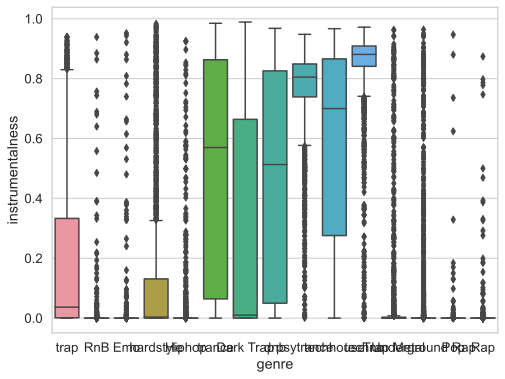

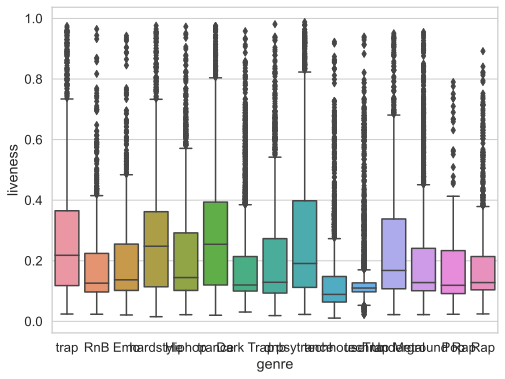

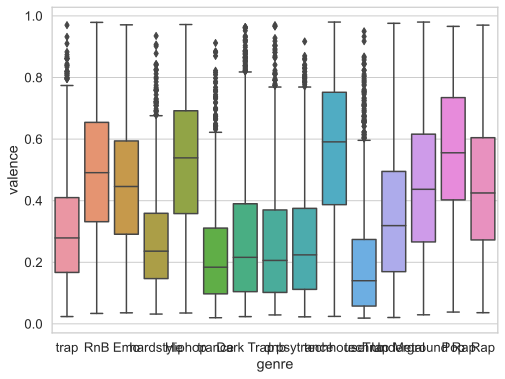

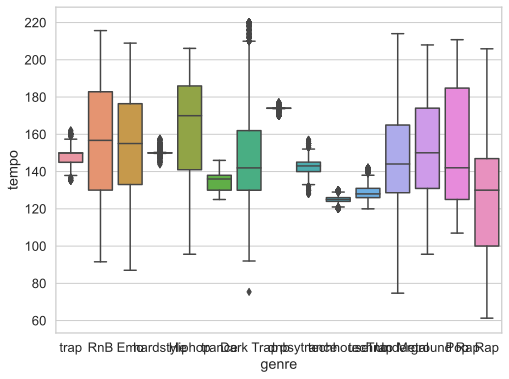

<Figure size 576x432 with 0 Axes>

In [151]:
for feature in X_train.columns:
    plt.figure(figsize=(8,6))
    print(sns.boxplot(x="genre", y=feature, data=X_train, width=.8))

In [152]:
#check class balance
y_train.value_counts()

Underground Rap    4671
Dark Trap          3627
Hiphop             2428
dnb                2409
trance             2390
trap               2389
techhouse          2376
hardstyle          2373
psytrance          2369
techno             2358
RnB                1684
Trap Metal         1571
Rap                1491
Emo                1337
Pop                 366
Name: genre, dtype: int64

In [153]:
#slim it down to a few interesting features for mvp
X_train_mvp = X_train[["danceability","energy","loudness","speechiness","acousticness",
                       "instrumentalness","liveness","valence","tempo"]]

X_train_mvp, X_val_mvp, y_train_mvp, y_val_mvp = train_test_split(X_train_mvp, y_train, test_size=0.25, random_state=99)

In [158]:
y_val_mvp

27809             trance
20999             Hiphop
32627          psytrance
22519          techhouse
7014     Underground Rap
              ...       
15241                Rap
31538          psytrance
41589          hardstyle
22904          techhouse
6003     Underground Rap
Name: genre, Length: 8460, dtype: object

## Modeling

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Helper function for printing confusion matrices (see: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823)

# prints confusion matrix as a heatmap which is nicer to visaulize

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [160]:
#test knn
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_mvp, y_train_mvp)
print("Training: {:6.2f}%".format(100*knn.score(X_train_mvp, y_train_mvp)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_val_mvp, y_val_mvp)))

Training:  62.53%
Validation set:  53.96%


In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
#test logistic
logit = LogisticRegression()
logit.fit(X_train_mvp, y_train_mvp)
print("Training: {:6.2f}%".format(100*logit.score(X_train_mvp, y_train_mvp)))
print("Test set: {:6.2f}%".format(100*logit.score(X_val_mvp, y_val_mvp)))

Training:  38.89%
Test set:  38.61%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
# test randomforest
rf = RandomForestClassifier(n_estimators=250, random_state=76)
rf.fit(X_train_mvp, y_train_mvp)
print("Training: {:6.2f}%".format(100*rf.score(X_train_mvp, y_train_mvp)))
print("Validation set: {:6.2f}%".format(100*rf.score(X_val_mvp, y_val_mvp)))


Training:  95.30%
Validation set:  64.23%


In [165]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

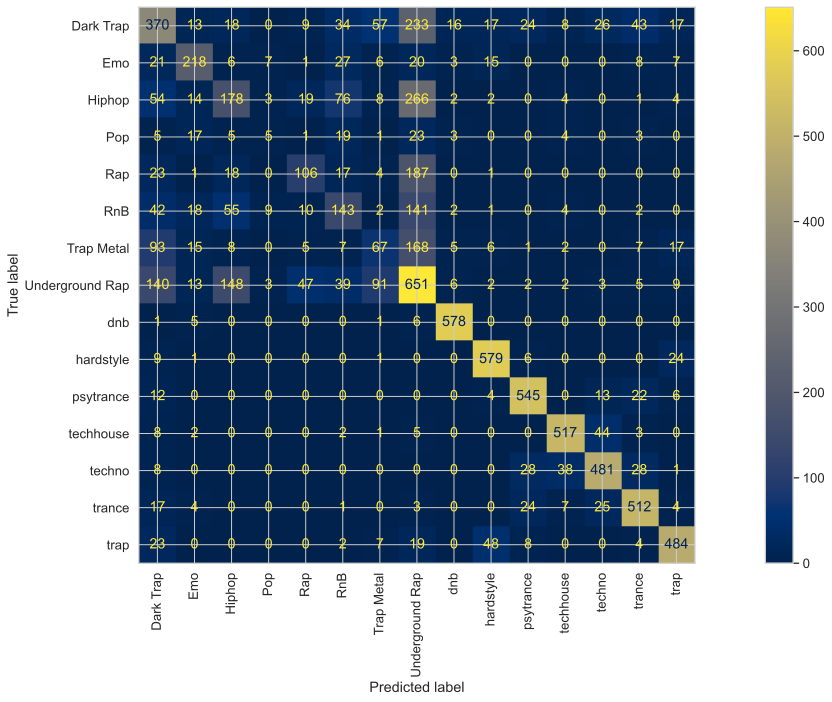

In [166]:
#random forest conf matrix
plot_confusion_matrix(rf, X_val_mvp, y_val_mvp, cmap=plt.cm.cividis, xticks_rotation='vertical')
plt.tight_layout()
plt.savefig("mvp_randomforest_conf_mat.png")

In [167]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB


In [168]:
#test naive bayes
nb = GaussianNB()
nb.fit(X_train_mvp, y_train_mvp)
print("Training: {:6.2f}%".format(100*nb.score(X_train_mvp, y_train_mvp)))
print("Validation set: {:6.2f}%".format(100*nb.score(X_val_mvp, y_val_mvp)))

Training:  55.44%
Validation set:  54.59%


In [169]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [170]:
#convert target labels to ints for XGB -> i dont think I have to do this??


y_train_mvp_df = pd.DataFrame(data= y_train_mvp)
y_val_mvp_df = pd.DataFrame(data= y_val_mvp)
y_test_df = pd.DataFrame(data= y_test)

le = preprocessing.LabelEncoder()

le.fit(y_train_mvp_df)
y_train_mvp_df['categorical_label'] = le.transform(y_train_mvp_df)

le.fit(y_val_mvp_df)
y_val_mvp_df['categorical_label'] = le.transform(y_val_mvp_df)

le.fit(y_test_df)
y_test_df['categorical_label'] = le.transform(y_test_df)

y_train_mvp = y_train_mvp_df['categorical_label']
y_val_mvp = y_val_mvp_df['categorical_label']
y_test = y_test_df['categorical_label']


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [189]:
#slim down X_test

#slim it down to a few interesting features for mvp
X_test_mvp = X_test[["danceability","energy","loudness","speechiness","acousticness",
                       "instrumentalness","liveness","valence","tempo"]]

In [209]:
import xgboost as xgb

In [210]:
#test xgb
bst = xgb.XGBClassifier(
        n_estimators=30000,
        use_label_encoder=False,
        max_depth=5,
        learning_rate=.1,
        objective='multi:softmax',
        min_child_weight=3,
        subsample=.8,
        colsample_bytree=.8,
        num_class=14)

eval_set=[(X_train_mvp, y_train_mvp),(X_val_mvp, y_val_mvp)]

fit_xgb = bst.fit(
            X_train_mvp, y_train_mvp,
            eval_set=eval_set,
            eval_metric='merror',
            early_stopping_rounds=30,
            verbose=False)

accuracy_score(y_test, bst.predict(X_test_mvp, ntree_limit=bst.best_ntree_limit))

0.659338061465721

In [ ]:
plot_confusion_matrix(bst, X_val_mvp, y_val_mvp, cmap=plt.cm.cividis, xticks_rotation='vertical')
plt.tight_layout()
plt.savefig("mvp_bst_conf_mat.png")

In [ ]:
#Gridsearch for hyperparameter tuning?